<a href="https://colab.research.google.com/github/dtabuena/Workshop/blob/main/Ripples.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
'Get Standard Modules'

import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy import stats
import os
from scipy.signal import butter,filtfilt
from tqdm import tqdm
import warnings
from IPython.display import clear_output
from datetime import datetime
import sys
import warnings
import shutil
from google import colab


warnings.filterwarnings('ignore')
np.set_printoptions(threshold=sys.maxsize)
clear_output(wait=False)



!pip install openpyxl
!pip install XlsxWriter
!pip install --upgrade pyabf
import pyabf





In [94]:
def get_drobox_folder(link, new_filename):
    'Download a folder from dropbox and unzip'
    zipped_file_path = "/content/"+new_filename + ".zip"
    unzipped_file_path = "/content/"+new_filename
    if not( os.path.exists(zipped_file_path)):
        !wget -O $zipped_file_path $link    # download with new name
    # if not( os.path.exists(new_filename_stripped)):
    !echo A | unzip $zipped_file_path -d $unzipped_file_path
    return new_filename




data_source = "https://www.dropbox.com/sh/cz03im6sa98nquz/AAB-WXnlE4jdTp37CiwVPUCLa?dl=0"
data_name = 'rip_data'
file_loc = get_drobox_folder(data_source, data_name)
file_list = []
for (root, dirs, file) in os.walk(file_loc):
    for f in file:
        if ".abf" in f:
            file_list.append(os.path.join(root,f))

Archive:  /content/rip_data.zip
mapname:  conversion of  failed
replace /content/rip_data/2023_07_05/2023x07x05_WT_F_P169_s003_0000.abf? [y]es, [n]o, [A]ll, [N]one, [r]ename:  extracting: /content/rip_data/2023_07_05/2023x07x05_WT_F_P169_s003_0000.abf  
 extracting: /content/rip_data/2023_07_05/2023x07x05_WT_F_P169_s001_0001.abf  
 extracting: /content/rip_data/2023_07_05/2023x07x05_WT_F_P169_s002_0002.abf  
 extracting: /content/rip_data/2023_07_05/2023x07x05_WT_F_P169_s003_0001.abf  
 extracting: /content/rip_data/2023_07_05/2023x07x05_WT_F_P169_s002_0001.abf  
 extracting: /content/rip_data/2023_07_05/2023x07x05_WT_F_P169_s004_0000.abf  
 extracting: /content/rip_data/2023_07_05/2023x07x05_WT_F_P169_s006_0000.abf  
 extracting: /content/rip_data/2023_07_05/2023x07x05_WT_F_P169_s001_0002.abf  
 extracting: /content/rip_data/2023_07_05/2023x07x05_WT_F_P169_s001_0003.abf  
 extracting: /content/rip_data/2023_07_05/2023x07x05_WT_F_P169_s002_0000.abf  
 extracting: /content/rip_data/2023

In [95]:
####### MATH
def z_trans_2(x):
    x_mean = np.expand_dims(np.mean(x,axis=1),1)
    x_std = np.expand_dims(np.std(x,axis=1),1)
    x_z = (x - x_mean) / x_std
    return x_z

def z_trans(x):
    x_mean = np.mean(x)
    x_std = np.std(x)
    x_z = (x - x_mean) / x_std
    return x_z

def mov_mean(x,stride):
    x_mm = np.convolve(x,np.ones(stride),'same')/stride
    return x_mm

In [96]:
file_list = []

dates_to_analyze = ['2023x07x12','2023x07x14','2023x07x17']
for (rt,dr,files) in os.walk('/content/rip_data/'):
    for f in files:
        for d in dates_to_analyze:
            if d in f and '.abf' in f[-4:]:
                file_list.append(os.path.join(rt,f))
                print(f)


2023x07x14_E3KI_F_P279_s6x7_0011.abf
2023x07x14_E3KI_F_P279_s6x7_0003.abf
2023x07x14_E3KI_F_P279_s6x7_0010.abf
2023x07x14_E3KI_F_P279_s001_0000.abf
2023x07x14_E3KI_F_P279_s6x7_0005.abf
2023x07x14_E3KI_F_P279_s4x5_0001.abf
2023x07x14_E3KI_F_P279_s6x7_0006.abf
2023x07x14_E3KI_F_P279_s4x5_0000.abf
2023x07x14_E3KI_F_P279_s002_0000.abf
2023x07x14_E3KI_F_P279_s6x7_0002.abf
2023x07x14_E3KI_F_P279_s001_0002.abf
2023x07x14_E3KI_F_P279_s6x7_0007.abf
2023x07x14_E3KI_F_P279_s6x7_0012.abf
2023x07x14_E3KI_F_P279_s6x7_0004.abf
2023x07x14_E3KI_F_P279_s002_0001.abf
2023x07x14_E3KI_F_P279_s6x7_0009.abf
2023x07x14_E3KI_F_P279_s001_0001.abf
2023x07x14_E3KI_F_P279_s2x3_0003.abf
2023x07x14_E3KI_F_P279_s6x7_0008.abf
2023x07x12_E4KI_F_P533_s3n4_0000.abf
2023x07x12_E4KI_F_P533_s1n2_0000.abf
2023x07x12_E4KI_F_P533_s5_0001.abf
2023x07x12_E4KI_F_P533_s6n7_0000.abf
2023x07x12_E4KI_F_P533_s5_0000.abf


In [101]:
def time_bands(abf,sweepNumber=0,channel=0,order = 4):
    fs = abf.sampleRate
    abf.setSweep(sweepNumber=sweepNumber,channel=channel)
    v_trace = abf.sweepY
    time = abf.sweepX

    new_fs = 1000
    ds_factor = np.ceil(fs/new_fs)
    v_trace_1khz = v_trace[::int(ds_factor)]
    time_1khz = time[::int(ds_factor)]




    b, a = scipy.signal.butter(order, [0.7,300], btype='bandpass',fs=new_fs)
    wide_band = scipy.signal.filtfilt(b, a, v_trace_1khz)

    b, a = scipy.signal.butter(order, [150,250], btype='bandpass',fs=new_fs)
    ripple_band = scipy.signal.filtfilt(b, a, wide_band)

    b, a = scipy.signal.butter(order, [15 ,50], btype='bandpass',fs=new_fs)
    slow_gamma_band = scipy.signal.filtfilt(b, a, wide_band)

    b, a = scipy.signal.butter(order, [1 ,20], btype='bandpass',fs=new_fs)
    sharp_wave_band = scipy.signal.filtfilt(b, a, wide_band)

    # b, a = scipy.signal.butter(order, [6 ,12], btype='bandpass',fs=new_fs)
    # theta_band = scipy.signal.filtfilt(b, a, wide_band)



    freq_bands = {'fs':fs,
                  'time_1khz':time_1khz,
                  'wide_band':wide_band,
                  'sharp_wave_band':sharp_wave_band,
                  'ripple_band':ripple_band,
                  'slow_gamma_band':slow_gamma_band,
                  }

    for k in freq_bands.keys():
        if 'band' in k:
                amplitude_envelope = np.abs(scipy.signal.hilbert(freq_bands[k]))
                freq_bands[k] = {'lfp': freq_bands[k], 'hilb_env':amplitude_envelope}

    return freq_bands

In [102]:

# col_list = ['fs','time_1khz','wide_band','sharp_wave_band','ripple_band','slow_gamma_band']
# rip_df = pd.DataFrame(index=file_list,columns=col_list)


rip_df = pd.DataFrame(index=file_list)
rip_df['filtered']=np.nan
rip_df['filtered'] = rip_df['filtered'].astype('object')

for f in rip_df.index:
    try:
        abf=pyabf.ABF(f)
        freq_bands = time_bands(abf,sweepNumber=0,channel=0)
        rip_df.at[f,'filtered'] = freq_bands
    except: None
# display(rip_df.head(20))

In [ ]:
def inspect_trace(trace,time,line_length=10,start_stop=[],z_scale=3,single_trace_plot_size=[30,2],ax_prev=False,spec_color=False):
    ''' waterfall plot of trace '''
    if len(start_stop) <2: start_stop=[time[0],time[-1]]
    fs = 1/(time[1]-time[0])
    max_t_adj =  np.ceil(start_stop[1]/line_length)*line_length
    pad_width =  int(fs*(max_t_adj) - len(time))
    pad_trace = np.pad(trace,((0,pad_width)),constant_values=(np.nan,np.nan))
    pad_time =  np.pad(time,pad_width,'constant',constant_values=(np.nan,np.nan))

    tics_per_line = int(fs*line_length)
    num_lines = int(len(time)/tics_per_line)+1
    pad_trace_stack = np.reshape(pad_trace,[num_lines,tics_per_line])

    line_time = np.arange(tics_per_line)/fs
    line_time_stack = np.resize(line_time,[num_lines,tics_per_line] )



    y_adjust_const = np.std(trace)*z_scale
    y_adj = y_adjust_const * (np.cumsum(np.ones_like(pad_trace_stack)*-1,axis=0)+1)

    if not ax_prev:
        plt.rcParams["axes.prop_cycle"] = plt.cycler("color", np.flip(plt.cm.viridis(np.linspace(0,1,10)),axis=0))
        fig,ax=plt.subplots(figsize=(single_trace_plot_size[0],single_trace_plot_size[1]*num_lines))
    else: (fig,ax) = ax_prev

    if not spec_color: ax.plot(line_time_stack.T,(pad_trace_stack+y_adj).T)
    else: ax.plot(line_time_stack.T,(pad_trace_stack+y_adj).T,color = spec_color)



    from matplotlib.ticker import MultipleLocator
    ax.yaxis.set_minor_locator(MultipleLocator(z_scale/2))

    return fig,ax

z_scale = 6
fig,ax = inspect_trace(z_trans(rip_df.loc[f,'filtered']['slow_gamma_band']['hilb_env']),rip_df.loc[f,'filtered']['time_1khz'],line_length=10,z_scale=z_scale,spec_color='grey')
ax.set_xlim(0,.6)
ax.grid(visible=True, which='both',axis='both')
fig,ax = inspect_trace(z_trans(rip_df.loc[f,'filtered']['ripple_band']['hilb_env']),rip_df.loc[f,'filtered']['time_1khz'],line_length=10,z_scale=z_scale,ax_prev=(fig,ax),spec_color='m')

plt.show()

In [ ]:
def triggered_inds(trace,fs,sd_thresh,min_dur_ms,peak_wind_ms):
    ''' trigger on crossing'''
    trig_bool = z_trans(trace)>sd_thresh
    min_dur_tic = int(min_dur_ms*fs/1000)
    trig_bool = mov_mean(trig_bool,min_dur_tic)==1
    trigs = np.arange(len(trig_bool))[np.diff(trig_bool,prepend=0)==1]

    ''' allign peaks'''
    tick_range = peak_wind_ms/1000*fs
    peak_window_tics = np.arange(0,tick_range,dtype=int)
    trig_alligned = []
    for t in trigs:
        sub_trace = trace[t+peak_window_tics]
        peak_tick = np.where(sub_trace==np.max(sub_trace))[0][0]
        trig_alligned.append(t+peak_tick-np.min(peak_window_tics))
    trig_alligned=np.array(trig_alligned)

    return trig_alligned




trace = rip_df.loc[f,'filtered']['slow_gamma_band']['hilb_env']
fs =    rip_df.loc[f,'filtered']['fs']
sd_thresh = 3
min_dur_ms = 5
triggered_inds(trace,fs,sd_thresh,min_dur_ms,peak_wind_ms=20)


In [128]:
a = np.zeros(30)
a[5:10] = 1
print(mov_mean(a,5))

[0.  0.  0.  0.2 0.4 0.6 0.8 1.  0.8 0.6 0.4 0.2 0.  0.  0.  0.  0.  0.
 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. ]


In [17]:
def get_SW_trig_inds(sharp_wave_band,fs,sw_thresh=-4,to_plot=False):
    '''find the crossings from the sharwave and return trigger indexes'''
    trig_bool = z_trans(sharp_wave_band)<sw_thresh
    trigs = np.where(np.diff(trig_bool,prepend=0)*1>.5)[0]
    peak_window_s = np.array([-25,25])/1000
    peak_window_tic = np.arange(peak_window_s[0]*fs,peak_window_s[1]*fs,1,dtype=int)
    plot_window_s = np.array([-150,150])/1000
    plot_window_tic = np.arange(plot_window_s[0]*fs,plot_window_s[1]*fs,1,dtype=int)
    if to_plot: fig,ax=plt.subplots(1,1, figsize=(6,4))

    trigs_alligned = []
    for t in trigs:
        try:
            sharp_wave_snip = sharp_wave_band[t+peak_window_tic]
            local_min_tic = np.where(sharp_wave_snip==np.min(sharp_wave_snip))[0][0]
            adjusted_t = t + local_min_tic+peak_window_tic[0]
            if to_plot:
                ax.plot(plot_window_tic/fs,sharp_wave_band[t+plot_window_tic],'grey')
                ax.plot(plot_window_tic/fs,sharp_wave_band[adjusted_t+plot_window_tic],'c')
        except: None ## likely bad window overlap
        trigs_alligned.append(adjusted_t)
    if to_plot:
        fig, ax = plot_abund_ts(time_1khz,trigs,bin_wid=10)
        return  trigs_alligned,fig,ax
    return trigs_alligned



rip_df['trigs']=np.nan
rip_df['trigs'] = rip_df['trigs'].astype('object')

for f in rip_df.index:
    try:
        abf=pyabf.ABF(f)
        fs = rip_df.loc[f,'fs']
        sharp_wave_band = rip_df.loc[f,'filtered']['sharp_wave_band']
        trigs = get_SW_trig_inds(sharp_wave_band,fs,sw_thresh=-4)
        rip_df.at[f,'trigs'] = trigs
    except: None

In [ ]:
rip_df['trigs']=np.nan
rip_df['trigs'] = rip_df['trigs'].astype('object')
rip_df['mean_rate']=np.nan
rip_df['mean_rate'] = rip_df['mean_rate'].astype('object')

for f in rip_df.index:
    try:
        abf=pyabf.ABF(f)
        fs = rip_df.loc[f,'filtered']['fs']
        sharp_wave_band = rip_df.loc[f,'filtered']['sharp_wave_band']
        trigs = get_SW_trig_inds(sharp_wave_band,fs,sw_thresh=-2)
        rip_df.at[f,'trigs'] = trigs
        mean_rate = len(trigs)/np.max(rip_df.loc[f,'filtered']['time_1khz'])
        rip_df.at[f,'mean_rate'] = mean_rate

    except: None
display(rip_df.head(30))

In [81]:
 plt.cm.copper(np.linspace(0,1,10))

array([[0.    , 0.    , 0.    , 1.    ],
       [0.1356, 0.0858, 0.0546, 1.    ],
       [0.2713, 0.1716, 0.1093, 1.    ],
       [0.4118, 0.2604, 0.1658, 1.    ],
       [0.5474, 0.3462, 0.2205, 1.    ],
       [0.6879, 0.435 , 0.277 , 1.    ],
       [0.8235, 0.5208, 0.3317, 1.    ],
       [0.964 , 0.6096, 0.3882, 1.    ],
       [1.    , 0.6954, 0.4429, 1.    ],
       [1.    , 0.7812, 0.4975, 1.    ]])

In [ ]:


# abf = pyabf.ABF('/content/Bumet_ephys_data/2023x07x06_E3KI_F_P525_s3x4_0000.abf')
# freq_bands = time_bands(abf,sweepNumber=0,channel=0)


def plot_abund_ts(time_1khz,trigs,bin_wid=10):
    fig,ax=plt.subplots(1,figsize=(16,4))
    bins = np.arange(0,np.max(time_1khz)+bin_wid,bin_wid)
    hist,edges = np.histogram(time_1khz[trigs], bins=bins)
    ax.bar(bins[1:],hist/bin_wid,width=bin_wid)
    ax.set_ylabel('SW abundance (Hz)')
    plt.show()
    return fig, ax

def get_waveforms_stack(waveform,trigs,fs,window_ms=[-150,150]):
    window_s = np.array(window_ms)/fs
    window_tics = np.arange(window_ms[0]*fs,window_ms[1]*fs,1,dtype=int)
    fig,ax=plt.subplots(1,1, figsize=(6,4))
    wave_snip_list = []
    for t in trigs:
        try: wave_snip_list.append(waveform[t+window_tics])
        except: None
    wave_snip_stack = np.stack(wave_snip_list,axis=-1)
    ax.plot(window_tics/fs,wave_snip_stack,'grey')
    ax.plot(window_tics/fs,np.median(wave_snip_stack,axis=1),'k')
    return wave_snip_stack

# trigs_alligned, fig, ax = get_SW_trig_inds(sharp_wave_band,fs,sw_thresh=-4,to_plot=True)

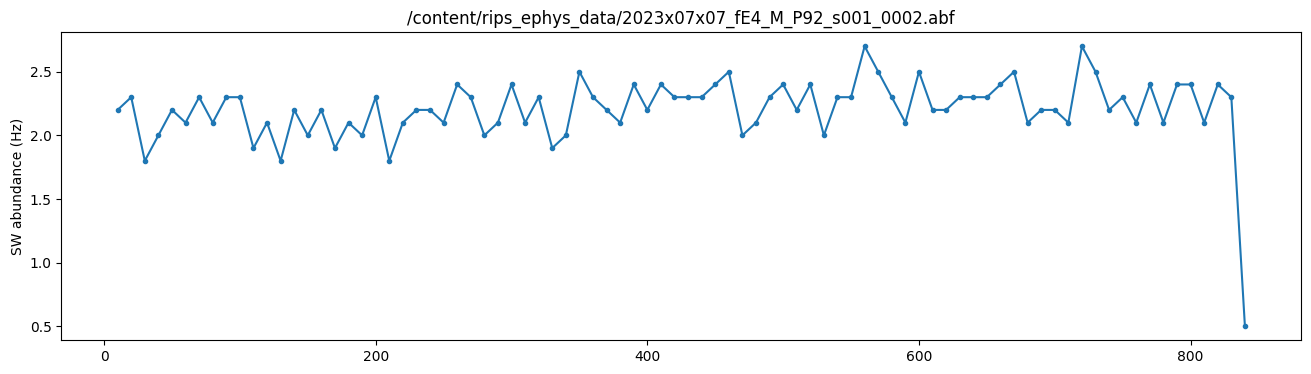

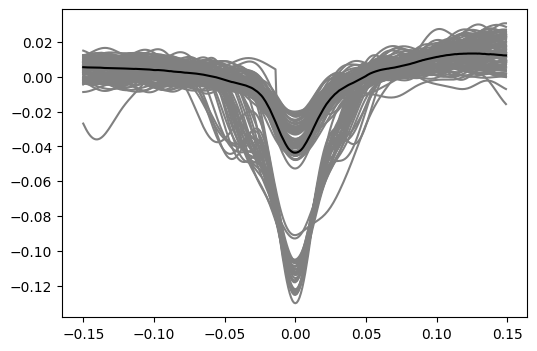

In [ ]:
rec = '/content/rips_ephys_data/2023x07x07_fE4_M_P92_s001_0002.abf'

abf = pyabf.ABF(rec)
freq_bands = time_bands(abf,sweepNumber=0,channel=0)
sharp_wave_band = freq_bands['sharp_wave_band']
fs = freq_bands['fs']
time_1khz= freq_bands['time_1khz']
trigs =  get_SW_trig_inds(sharp_wave_band,fs,sw_thresh=-1)
fig,ax=plt.subplots(1,figsize=(16,4))
bin_wid=10
bins = np.arange(0,np.max(time_1khz)+bin_wid,bin_wid)
hist,edges = np.histogram(time_1khz[trigs], bins=bins)
ax.plot(bins[1:],hist/bin_wid,'.-')
ax.set_ylabel('SW abundance (Hz)')
ax.set_title(rec)
plt.show()

def get_waveforms_stack(waveform,trigs,fs,window_ms=[-75,75],plot_lim=100):
    window_s = np.array(window_ms)/1000
    window_tics = np.arange(window_s[0]*fs,window_s[1]*fs,1,dtype=int)
    fig,ax=plt.subplots(1,1, figsize=(6,4))
    wave_snip_list = []
    for t in trigs:
        try: wave_snip_list.append(waveform[t+window_tics])
        except: None
    wave_snip_stack = np.stack(wave_snip_list,axis=-1)
    ax.plot(window_tics/fs,wave_snip_stack[:,:plot_lim],'grey')
    ax.plot(window_tics/fs,np.median(wave_snip_stack,axis=1),'k')
    return wave_snip_stack

sharp_wave_stack = get_waveforms_stack(sharp_wave_band,trigs,fs=1000,window_ms=[-150,150])

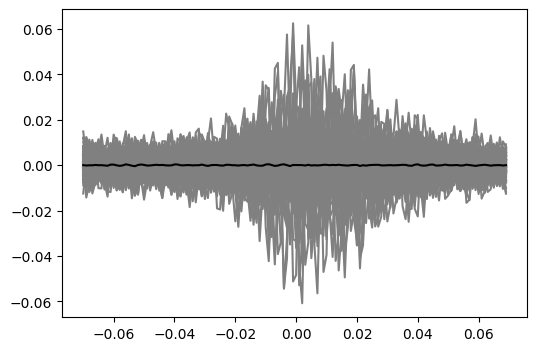

In [ ]:
ripple_band = freq_bands['ripple_band']
ripple_band_stack = get_waveforms_stack(ripple_band,trigs,fs=1000,window_ms=[-70,70],plot_lim=100)

In [ ]:
file_list

for rec in file_list:
    abf = pyabf.ABF(rec)
    freq_bands = time_bands(abf,sweepNumber=0,channel=0)

    sharp_wave_band = freq_bands['sharp_wave_band']
    fs = freq_bands['fs']
    time_1khz= freq_bands['time_1khz']
    trigs =  get_SW_trig_inds(sharp_wave_band,fs,sw_thresh=-3)

    fig,ax=plt.subplots(1,figsize=(16,4))
    bins = np.arange(0,np.max(time_1khz)+bin_wid,bin_wid)
    hist,edges = np.histogram(time_1khz[trigs], bins=bins)
    ax.plot(bins[1:],hist/bin_wid,'.-')
    ax.set_ylabel('SW abundance (Hz)')
    ax.set_title(rec)
    plt.show()
    sharp_wave_stack = get_waveforms_stack(sharp_wave_band,trigs,fs=1000,window_ms=[-150,150])
    ripple_stack = get_waveforms_stack(ripple_band,trigs,fs=1000,window_ms=[-150,150])

In [ ]:
def get_waveforms_stack(waveform,trigs,fs,window_ms=[-150,150]):
    window_s = np.array(window_ms)/fs
    window_tics = np.arange(window_ms[0]*fs,window_ms[1]*fs,1,dtype=int)
    fig,ax=plt.subplots(1,1, figsize=(6,4))
    wave_snip_list = []
    for t in trigs:
        try: wave_snip_list.append(waveform[t+window_tics])
        except: None
    wave_snip_stack = np.stack(wave_snip_list,axis=-1)
    ax.plot(window_tics/fs,wave_snip_stack,'grey')
    ax.plot(window_tics/fs,np.median(wave_snip_stack,axis=1),'k')
    return wave_snip_stack
sharp_wave_stack = get_waveforms_stack(sharp_wave_band,trigs,fs=1000,window_ms=[-150,150])
ripple_stack = get_waveforms_stack(ripple_band,trigs,fs=1000,window_ms=[-150,150])

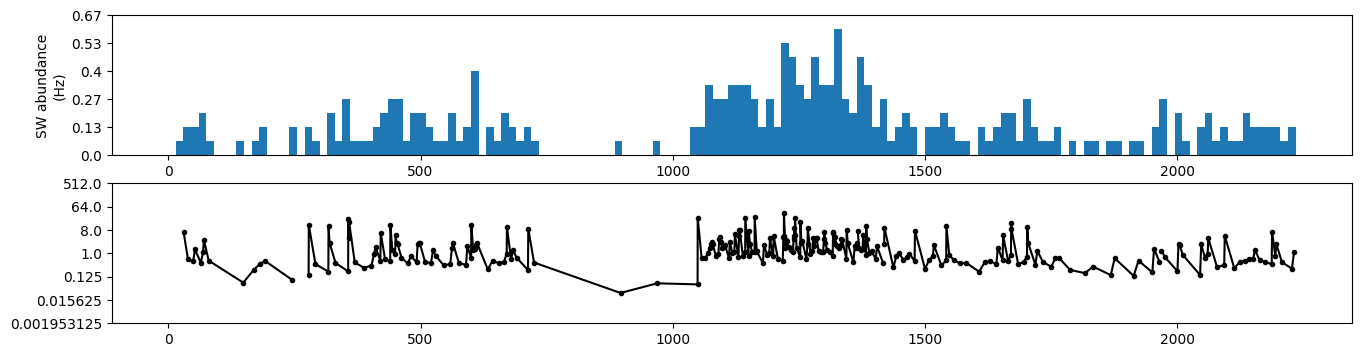

In [ ]:
# sharp_wave_instrate = fs/np.diff(trigs_alligned)
# fig,ax=plt.subplots(2,1,figsize=(16,4))

# bin_wid = 15
# ax[0].hist(time_1khz[trigs_alligned],bins=np.arange(0,np.max(time_1khz)+bin_wid,bin_wid))
# ax[0].set_ylabel('SW abundance'+'\n'+'(Hz)')
# ax[0].set_yticks(ax[0].get_yticks(),['{:,.2}'.format(y/bin_wid) for y in ax[0].get_yticks()])

# ax[1].plot(time_1khz[trigs_alligned[1:]],sharp_wave_instrate,'.-k')
# ax[1].set_yscale('log', base=2)
# ylims_auto =ax[1].get_ylim()
# yticks_auto = ax[1].get_yticks()
# yticks_auto_str = [str(tic) for tic in yticks_auto]
# ax[1].set_yticks(yticks_auto,yticks_auto_str)

# for a in ax:
#     a.set_xlim(ax[0].get_xlim())
# plt.show()


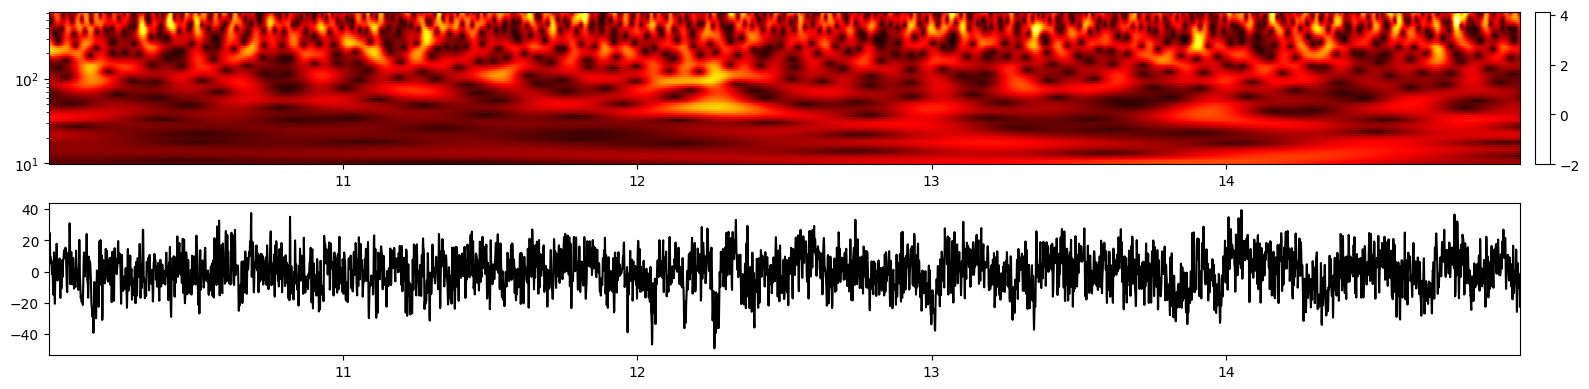

In [ ]:

# #### Set plot
# plot_window = [10,15]
# t_condit = np.logical_and(time_1khz>plot_window[0] , time_1khz<plot_window[1])


# w = 6.
# top_freq = fs/2
# top_freq = 600
# freq = np.logspace(np.log2(10), np.log2(top_freq), num=80, endpoint=True, base=2)
# widths = w*fs / (2*freq*np.pi)
# cwtm = scipy.signal.cwt(narrow_band, scipy.signal.morlet2, widths, w=w)

# cw_abs = np.abs(cwtm)
# cw_mean = np.expand_dims(np.mean(cw_abs,axis=1),-1)
# cw_std = np.expand_dims(np.std(cw_abs,axis=1),-1)
# cw_z = (cw_abs - cw_mean) / cw_std

# fig,ax=plt.subplots(2,2, figsize=(16,4),gridspec_kw={"height_ratios":[1,1],"width_ratios":[99,1]})
# ax=ax.flatten()
# cb= ax[0].pcolormesh(time_1khz[t_condit],freq,cw_z[:,t_condit],cmap='hot')
# fig.colorbar(cb,cax=ax[1])
# ax[2].plot(time_1khz[t_condit],narrow_band[t_condit] * 1000,'k')
# ax[3].axis('off')
# plt.tight_layout()
# xlims = ax[0].get_xlim()
# for a in ax: a.set_xlim(xlims)
# ax[0].set_yscale('log')

In [ ]:
# # from scipy import signal





# fs = 10000
# w = 6.
# top_freq = fs/2
# top_freq = 600
# freq = np.linspace(1, top_freq, 100)
# freq = np.logspace(np.log2(10), np.log2(top_freq), num=40, endpoint=True, base=2)
# widths = w*fs / (2*freq*np.pi)
# cwtm = scipy.signal.cwt(in0, scipy.signal.morlet2, widths, w=w)

# cw_abs = np.abs(cwtm)
# cw_mean = np.expand_dims(np.mean(cw_abs,axis=1),-1)
# cw_std = np.expand_dims(np.std(cw_abs,axis=1),-1)
# cw_z = (cw_abs - cw_mean) / cw_std





NameError: ignored

In [ ]:
# b, a = scipy.signal.butter(2, [4,120], btype='bandpass',fs=10000)
# gamma_band = scipy.signal.filtfilt(b, a, in0)
# gamma_band_z = z_trans(gamma_band)
# trig = np.diff(gamma_band_z<-3,prepend=0)==1

# b, a = scipy.signal.butter(4, [130,180], btype='bandpass',fs=10000)
# ripple_band = scipy.signal.filtfilt(b, a, in0-gamma_band)
# ripple_band_z= z_trans(ripple_band)

# trig_ind = np.where(trig)[0]

# wave_list = []
# trig_ind_peaks = []
# for t in trig_ind:
#     try:
#         prepend_g = 1500
#         append_g = 1500
#         sub_x = np.arange(t-prepend_g,t+append_g)
#         sub_y = gamma_band[sub_x]
#         min_ind = np.where(sub_y==np.min(sub_y))[0][0]
#         t_adj=t+(min_ind-prepend_g)
#         sub_x = np.arange(t_adj-prepend_g,t_adj+append_g)
#         sub_y = gamma_band[sub_x]
#         wave_list.append(sub_y)
#         trig_ind_peaks.append(t_adj)
#     except: None

# rip_list = []
# for t in trig_ind_peaks:
#     try:
#         prepend_r = 500
#         append_r = 500
#         t=t
#         sub_x = np.arange(t-prepend_r,t+append_r)
#         sub_y = ripple_band[sub_x]
#         rip_list.append(sub_y)
#     except: None

# window_t_g = np.arange(-prepend_g,append_g)/10000*1000
# window_t_r = np.arange(-prepend_r,append_r)/10000*1000

# rips = np.stack(rip_list)
# waves = np.stack(wave_list)
# fig,ax=plt.subplots(1,4,figsize=[12,4],gridspec_kw={'width_ratios':[30,30,30,1]})
# ax=ax.flatten()
# ax[0].plot(window_t_g, waves.T*1000,color='grey',zorder=-1)
# ax[0].plot(window_t_g, np.mean(waves,axis=0)*1000,'r',zorder=999)
# ax[1].plot(window_t_r,rips.T*1000,color='grey')
# ax[1].plot(window_t_r,np.mean(rips,axis=0)*1000,'r',zorder=999)



# cw_list = []
# prepend_g = 1500
# append_g = 1500
# for t in trig_ind_peaks:
#     try:
#         sub_x = np.arange(t-prepend_g,t+append_g)
#         cw_list.append(cw_z[:,sub_x])
#     except: None

# cw_stack = np.stack(cw_list,axis=-1)
# cw_mean = np.mean(cw_stack,-1)
# cb= ax[2].pcolormesh(window_t_g,freq,cw_mean,cmap='hot')
# fig.colorbar(cb,cax=ax[3])
# num_SWs = len(trig_ind_peaks)
# rate = round(num_SWs/len(in0)*10000,2)

# ax[0].set_title('Sharp_Waves (n=' + str(num_SWs)+'; '+str(rate)+'/s)')
# ax[0].set_ylabel('LFP (uV)')
# ax[1].set_title('SW triggered Ripple_Band')
# ax[1].set_ylabel('LFP (uV)')
# ax[2].set_title('SW triggered WaveletSpectrogram')
# ax[2].set_ylabel('Freq (Hz)')
# ax[3].set_ylabel('z_power')
# for a in ax[:-1]:
#     a.set_xlabel('time (ms)')

# plt.tight_layout()

5000


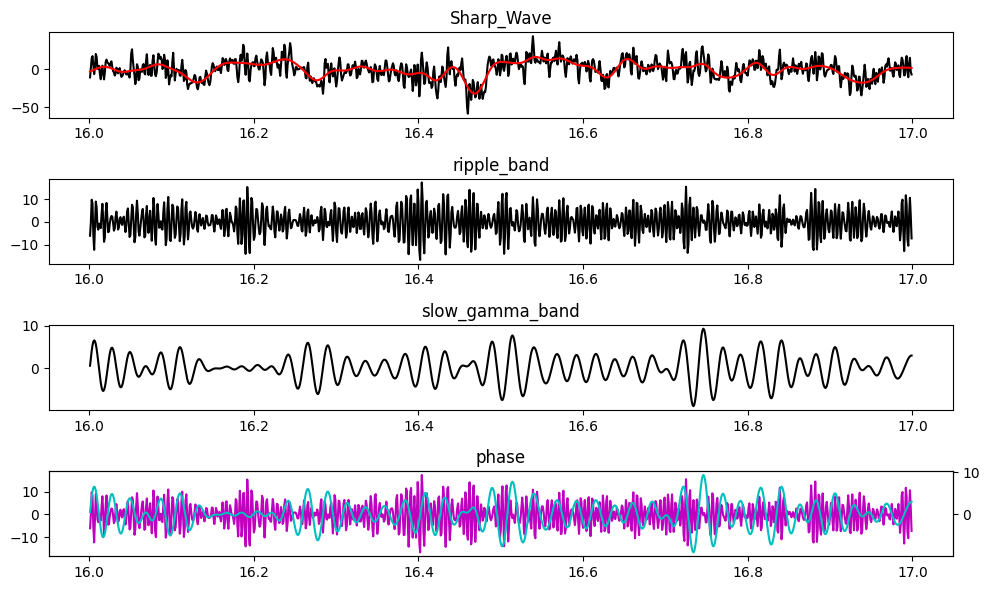

In [ ]:
# #### Gillespie et al Method
# abf = pyabf.ABF('/content/Bumet_ephys_data/2023x07x06_E3KI_F_P525_s3x4_0000.abf')



# fs = abf.sampleRate
# print(fs)
# abf.setSweep(sweepNumber=0,channel=0)
# v_trace = abf.sweepY
# time = abf.sweepX

# ds_factor = np.ceil(fs/1000)
# v_trace_1khz = v_trace[::int(ds_factor)]
# time_1khz = time[::int(ds_factor)]
# fs = 1000

# order = 4

# b, a = scipy.signal.butter(order, [0.7,300], btype='bandpass',fs=fs)
# narrow_band = scipy.signal.filtfilt(b, a, v_trace_1khz)

# b, a = scipy.signal.butter(order, [150,250], btype='bandpass',fs=fs)
# ripple_band = scipy.signal.filtfilt(b, a, v_trace_1khz)

# b, a = scipy.signal.butter(order, [30 ,50], btype='bandpass',fs=fs)
# slow_gamma_band = scipy.signal.filtfilt(b, a, v_trace_1khz)

# b, a = scipy.signal.butter(order, [1 ,30], btype='bandpass',fs=fs)
# sharp_wave_band = scipy.signal.filtfilt(b, a, v_trace_1khz)

# b, a = scipy.signal.butter(order, [6 ,12], btype='bandpass',fs=fs)
# theta_band = scipy.signal.filtfilt(b, a, v_trace_1khz)

# #### Set plot
# plot_window = [16,17]
# t_condit = np.logical_and(time_1khz>plot_window[0] , time_1khz<plot_window[1])
# fig,ax = plt.subplots(4,1,figsize=(10,6))
# ax=ax.flatten()
# ax[0].plot(time_1khz[t_condit],narrow_band[t_condit] * 1000,'k')
# ax[0].plot(time_1khz[t_condit],sharp_wave_band[t_condit] * 1000,'r')
# ax[0].set_title('Sharp_Wave')

# ax[1].plot(time_1khz[t_condit],ripple_band[t_condit] * 1000,'k')
# ax[1].set_title('ripple_band')

# ax[2].plot(time_1khz[t_condit],slow_gamma_band[t_condit] * 1000,'k')
# ax[2].set_title('slow_gamma_band')


# ax[3].plot(time_1khz[t_condit],ripple_band[t_condit] * 1000,'m')
# ax[3].twinx().plot(time_1khz[t_condit],slow_gamma_band[t_condit] * 1000,'c')
# ax[3].set_title('phase')

# plt.tight_layout()